# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
browser = browser.html
soup = soup(browser, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [7]:
# Extract all rows of data
rows_of_data = soup.body.find_all('tr', class_='data-row')
len(rows_of_data)

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
all_rows_list = [] # list contains all rows of the table 
# Loop through the scraped data to create a list of rows
for row in rows_of_data:
    item_list = [] # list contains the figures in each row
    for item in row:# loop through the row(each line to fill the list with  figures of each row)
        item_list.append(item.text)
    all_rows_list.append(item_list)
print(all_rows_list[0:10])   

[['\n', '2', '\n', '2012-08-16', '\n', '10', '\n', '155', '\n', '6', '\n', '-75.0', '\n', '739.0', '\n'], ['\n', '13', '\n', '2012-08-17', '\n', '11', '\n', '156', '\n', '6', '\n', '-76.0', '\n', '740.0', '\n'], ['\n', '24', '\n', '2012-08-18', '\n', '12', '\n', '156', '\n', '6', '\n', '-76.0', '\n', '741.0', '\n'], ['\n', '35', '\n', '2012-08-19', '\n', '13', '\n', '157', '\n', '6', '\n', '-74.0', '\n', '732.0', '\n'], ['\n', '46', '\n', '2012-08-20', '\n', '14', '\n', '157', '\n', '6', '\n', '-74.0', '\n', '740.0', '\n'], ['\n', '57', '\n', '2012-08-21', '\n', '15', '\n', '158', '\n', '6', '\n', '-78.0', '\n', '740.0', '\n'], ['\n', '68', '\n', '2012-08-22', '\n', '16', '\n', '158', '\n', '6', '\n', '-77.0', '\n', '740.0', '\n'], ['\n', '79', '\n', '2012-08-23', '\n', '17', '\n', '159', '\n', '6', '\n', '-76.0', '\n', '742.0', '\n'], ['\n', '112', '\n', '2012-08-27', '\n', '21', '\n', '161', '\n', '6', '\n', '-74.0', '\n', '741.0', '\n'], ['\n', '114', '\n', '2012-08-28', '\n', '22',

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_titles = [] # list contains the titles of the table
title = soup.body.find('tr') # find the titles in the html using beatifulsoup: find
for name in title:
    column_titles.append(name.text)
column_titles

['\n',
 'id',
 '\n',
 'terrestrial_date',
 '\n',
 'sol',
 '\n',
 'ls',
 '\n',
 'month',
 '\n',
 'min_temp',
 '\n',
 'pressure',
 '\n']

In [23]:
# Confirm DataFrame was created successfully
data_in_dataframe = pd.DataFrame(all_rows_list)
data_in_dataframe.head()
# display the titles of columns using the list created filled by column names :
data_in_dataframe.columns = (column_titles)
data_in_dataframe
#exclude the unwanted columns:
final_temp_df = data_in_dataframe[['id','terrestrial_date','sol','ls','month','min_temp','pressure']]
final_temp_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
final_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [25]:
final_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [33]:
final_temp_df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,2,2012-08-16,10,96,4,-77.0,850.0
freq,1,1,1,8,194,138,25


In [34]:
# Change data types for data analysis
clean_final_temp_df = final_temp_df.astype({'id':'object','terrestrial_date':'datetime64[ns]', 'sol':'int64', 
                              'ls':'int64', 'month':'int64', 'min_temp':'float64', 'pressure':'float64'})
clean_final_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [35]:
# Confirm type changes were successful by examining data types again
clean_final_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [59]:
# 1. How many months are there on Mars?

No_of_months = clean_final_temp_df['month'].unique()
print(No_of_months)
print(len('No_of_months'))

[ 6  7  8  9 10 11 12  1  2  3  4  5]
12


In [64]:
# 2. How many Martian days' worth of data are there?
No_of_martian_days = clean_final_temp_df['sol'].count()
print(No_of_martian_days)

1867


In [67]:
# 3. What is the average low temperature by month?
average_low_temp = clean_final_temp_df.groupby('month')['min_temp'].mean()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'the average low daily temperature by month')

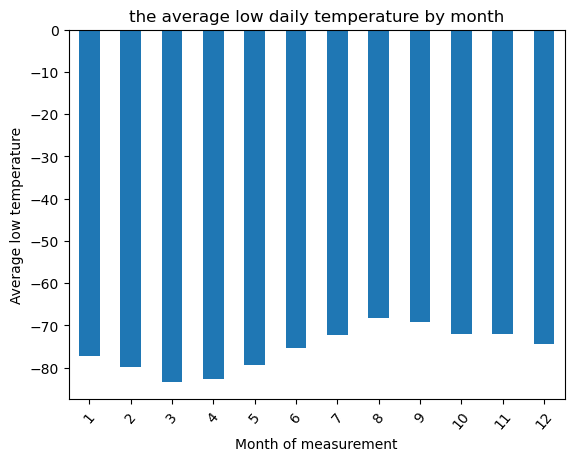

In [89]:
# Plot the average temperature by month
ax = average_low_temp.plot.bar(x='month', y='average_low_temp', rot=50)
plt.xlabel('Month of measurement')
plt.ylabel('Average low temperature')
plt.title("the average low daily temperature by month")

In [137]:
# Identify the coldest and hottest months in Curiosity's location
# Get min and max temperatures:
coldest_ = clean_final_temp_df['min_temp'].min()
hottest_ = clean_final_temp_df['min_temp'].max()

print(coldest_)
print(hottest_)

# sort by low temperature:
sort_by_temp = clean_final_temp_df.sort_values('min_temp')
# reset index of the sorted dataframe: 
indexed_dataframe = sort_by_temp.reset_index()
indexed_dataframe.head()
coldest = indexed_dataframe.iloc[0,5]
print('the coldest month is :', coldest)


-90.0
-62.0
the coldest month is : 3


In [135]:
# sort by high temperature:
sort_by_high_temp = clean_final_temp_df.sort_values('min_temp', ascending=False)
sort_by_high_temp.head()
# reset index of the sorted dataframe: 
indexed_high_dataframe = sort_by_high_temp.reset_index()
indexed_high_dataframe.head()
hotest = indexed_high_dataframe.iloc[0,5]
print('the hotest month is:', hotest)

the hotest month is: 1


In [82]:
# 4. Average pressure by Martian month
average_pressure_temp = clean_final_temp_df.groupby('month')['pressure'].mean()
average_pressure_temp

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 1.0, 'the average daily atmospheric pressure by month')

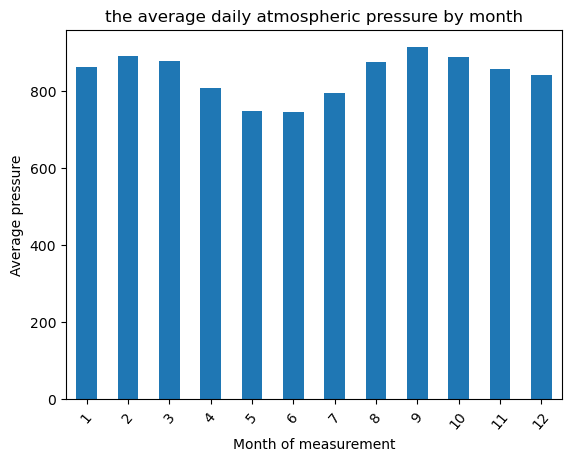

In [90]:
# Plot the average pressure by month
ax = average_pressure_temp.plot.bar(x='month', y='average_pressure_temp', rot=50)
plt.xlabel('Month of measurement')
plt.ylabel('Average pressure')
plt.title("the average daily atmospheric pressure by month")

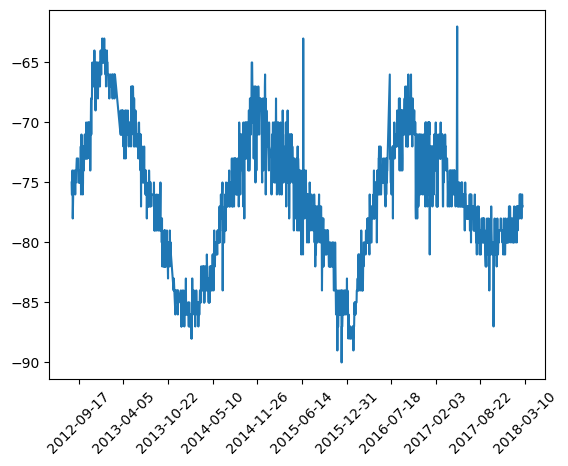

In [139]:
# 5. How many terrestrial (earth) days are there in a Martian year?
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots()
ax.plot(clean_final_temp_df['terrestrial_date'], clean_final_temp_df['min_temp'])

ax.xaxis.set_major_locator(MultipleLocator(200))
plt.xticks(rotation = 45)
plt.show()

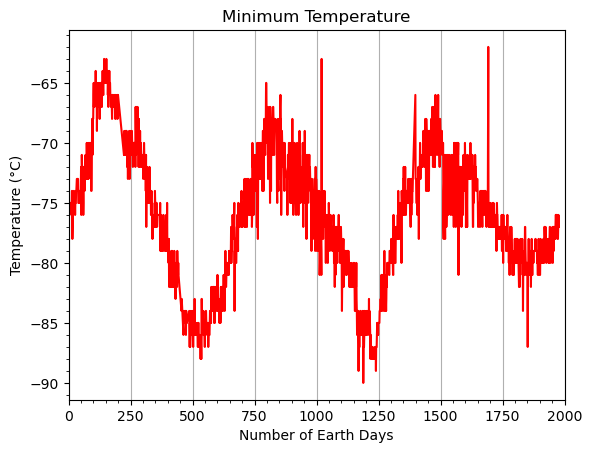

In [142]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(clean_final_temp_df["sol"], clean_final_temp_df["min_temp"], color="red")
plt.title("Minimum Temperature")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature (°C)")
plt.grid(True, axis='x')
plt.xlim(0, 2000)
plt.minorticks_on()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [140]:
# Write the data to a CSV
clean_final_temp_df.to_csv("mars_weather.csv")

In [21]:
browser.quit()